# Gradient Descent Exploration
This script explores two use cases for the gradient descent algorithm:
1. Minimization for the bottom half of a sphere in ${\rm I\!R^3}$ (or any arbitrary function)
2. Linear regression

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import math

## Minimization for Bottom Half of Sphere
<img src="https://drive.google.com/uc?id=1PbhQWAcnKC52CKzuUV8YiJpqCTfeSKe9" width="400" height="200" />

This section attempts to use GD to minimize a cost function that is modeled as the bottom half of a sphere.  This function can be modeled in ${\rm I\!R^3}$ as:

$$𝑓(𝑥,𝑦)=𝑧=-\sqrt{25−(𝑥−2)^2−(𝑦−3)^2}$$

The properties of the sphere are:
* Center at x = 2, y = 3, z = 0
* Radius = 5

In [2]:
# Function definitions of the function and the partial derivatives
def sphere_function(x,y):
  z = math.sqrt((25 - (x-2)**2 - (y-3)**2)) # ** for carrot (^) symbol
  return z

def dz_dx(x,y):
  output = (x-2) / math.sqrt(25 - (x-2)**2 - (y-3)**2)
  return output

def dz_dy(x,y):
  output = (y-3) / math.sqrt(25 - (x-2)**2 - (y-3)**2)
  return output

In [3]:
# The initial guess can be below or above the target and the math
# will take care of itself
learning_rate = 0.01
max_limit = 7500
x_current = 0
y_current = 0
x_history = np.zeros(max_limit)
y_history = np.zeros(max_limit)
for i in range(max_limit):
  x_history[i] = x_current
  y_history[i] = y_current
  dx = dz_dx(x_current,y_current)
  dy = dz_dy(x_current,y_current)
  # Minimization means subtraction of partial derivative. Increment x and y
  x_current = x_current - learning_rate * dx
  y_current = y_current - learning_rate * dy

Number of iterations =  7500
Max x value from gradient descent:  1.9999994754936903
Max y value from gradient descent:  2.9999992132405353


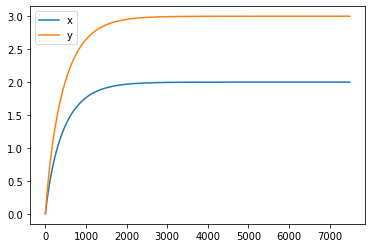

In [4]:
# Plotting the histories to see where convergence occurs
plt.plot(x_history)
plt.plot(y_history)
plt.legend(['x', 'y'],loc="upper left")
print("Number of iterations = ", max_limit)
print("Max x value from gradient descent: ", x_history[max_limit-1])
print("Max y value from gradient descent: ", y_history[max_limit-1])

In [5]:
# Now, we ought to check how quickly this convergence actually happens
# Input: 'x' or 'y' as strings, which tells the function which function to
# count the number of convergence steps for. 
# Output: Number of steps it took for the GD algorithm to converge to a solution
# This exact convergence occurs when the diffrential increments dx or dy come
# close to zero.  It never will reach zero, so we set a threshold, epsilon, to
# 0.00001, where we are close enough to our solution.
def convergence_steps(x_or_y):
  learning_rate = 0.01
  max_limit = 7500
  x_current = 0
  y_current = 0
  epsilon = 0.000001
  for i in range(max_limit):
    dx = dz_dx(x_current,y_current)
    dy = dz_dy(x_current,y_current)
    x_current = x_current - learning_rate * dx
    y_current = y_current - learning_rate * dy
    # Check if convergence is for x or y variable
    if (x_or_y == 'x'):
      # Take the absolute of dx and dy to handle +/- values
      if (abs(dx) <= epsilon):
        num_steps = i
        return num_steps
    elif (x_or_y == 'y'):  
      if (abs(dy) <= epsilon):
        num_steps = i
        return num_steps

# Calculate number of iterations needed to converge to the minimum value of z
convergence_steps_x = convergence_steps('x')
convergence_steps_y = convergence_steps('y')

print("For an initial value of x = 0 and y = 0:")
print("Steps needed to converge to x: ", convergence_steps_x)
print("Steps needed to converge to y: ", convergence_steps_y)

For an initial value of x = 0 and y = 0:
Steps needed to converge to x:  6373
Steps needed to converge to y:  6576


## Linear Regression
This section performs linear regression with scikit-learn and gradient descent and compares the two results.

For the equation y = mx+b, the residual sum of squares the function we need to optimize.  The residual sum of squares is as follows:

$$ RSS = \sum_{i=1}^{N} (y_{i} - (mx_{i} + b))^2$$

The RSS is simply the sum of the sqaure of the residuals (residuals can be thought of as the error, or actual - predicted).

We can consider this equation as a function of m and b, since y and x are from our dataset, typically, and we want to find a relation between the predictor variable, x, and the explanatory variable (response variable), y.

The partial derivatives of the RSS with respect to b and m are:  
$$\frac{\partial RSS(m,b)}{\partial b} = -2\sum_{i=1}^{N} (y_{i} - (mx_{i} + b)$$

$$\frac{\partial RSS(m,b)}{\partial m} = -2\sum_{i=1}^{N} (y_{i} - (mx_{i} + b))x_{i}$$

### Conclusion
The regressions for the two models were found to be:
1. Scikit-learn model:
$y = 3.88399457x + 11.22062684$
2. Gradient descent model:
$y = 3.89994122 + 11.00475563$

Scikit-learn uses the inverse of a matrix method to find the slope and y-intercept, which means that it is one of the most accurate methods for finding a regression line.  The gradient descent model was surprisingly close, but something to keep in mind is that it was only run with 25000 iterations, meaning that it will keep getting closer to the Scikit-learn model over time.  GD never converges to the right answer, but it can get pretty close given enough iterations.


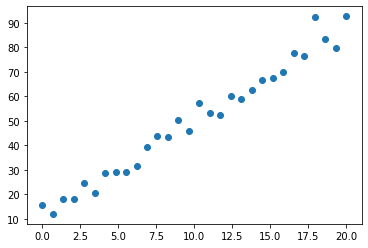

In [6]:
# Create data set from numpy
# train_x is the predictor.  train_y is the response variable. 
n_samples = 30
train_x = np.linspace(0,20,n_samples)
train_y = 3.7 * train_x + 14 + 4 * np.random.randn(n_samples)
plt.plot(train_x, train_y,'o')

### Scikit Learn Model

In [7]:
# Regression model from sklearn
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Preprocess the data for LinearRegression Model
sklearn_input_value = train_x.reshape(-1,1)
sklearn_output_value = train_y.reshape(-1,1)

# Create and fit the model
linreg = linear_model.LinearRegression()
linreg.fit(sklearn_input_value, sklearn_output_value)

# Print m and b to terminal
print("y-intercept: b = ",linreg.intercept_)
print("slope: m = ",linreg.coef_)

y-intercept: b =  [11.22062684]
slope: m =  [[3.88399457]]


### Gradient Descent Model

In [8]:
# Partial derivative functions of RSS
def dRSS_db(m,b,x,y):
  return (-2*sum((y-m*x-b)))

def dRSS_dm(m,b,x,y):
  return (-2*sum((y-m*x-b)*x))

In [9]:
m_current = 0
b_current = 0
learning_rate = 0.00001
max_limit = 25000
m_history = np.zeros(max_limit)
b_history = np.zeros(max_limit)
for i in range(max_limit):
  m_history[i] = m_current
  b_history[i] = b_current
  dm = dRSS_dm(m_current,b_current,train_x,train_y)
  db = dRSS_db(m_current,b_current,train_x,train_y)
  m_current = m_current - learning_rate * dm
  b_current = b_current - learning_rate * db

Number of iterations =  25000
Max m value from gradient descent:  3.899941222667007
Max b value from gradient descent:  11.004755633355993


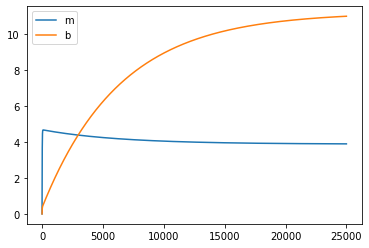

In [10]:
plt.plot(m_history)
plt.plot(b_history)
plt.legend(['m', 'b'],loc="upper left")
print("Number of iterations = ", max_limit)
print("Max m value from gradient descent: ", m_history[max_limit-1])
print("Max b value from gradient descent: ", b_history[max_limit-1])